<a href="https://colab.research.google.com/github/sottohy/Arabic-character-recognition-models/blob/main/Arabic_characters_recognition_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load training data
train_images = pd.read_csv("/content/drive/MyDrive/Arabic-Characters-Recognition/csvTrainImages 13440x1024.csv", header=None).values
train_labels = pd.read_csv("/content/drive/MyDrive/Arabic-Characters-Recognition/csvTrainLabel 13440x1.csv", header=None).values

test_images = pd.read_csv("/content/drive/MyDrive/Arabic-Characters-Recognition/csvTestImages 3360x1024.csv", header=None).values
test_labels = pd.read_csv("/content/drive/MyDrive/Arabic-Characters-Recognition/csvTestLabel 3360x1.csv", header=None).values


class_names = ['أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي']


In [15]:
# Normalization
train_images = train_images / 255
test_images = test_images / 255

In [16]:
# Unique classes & their number
unique_classes, count = np.unique(train_labels, return_counts=True)
number_of_classes = len(unique_classes)
print("Number of unique classes is", number_of_classes)

# Distribution of samples in each class
for i, j in zip(unique_classes, count):
    print(f"Class {i} has {j} samples")


Number of unique classes is 28
Class 1 has 480 samples
Class 2 has 480 samples
Class 3 has 480 samples
Class 4 has 480 samples
Class 5 has 480 samples
Class 6 has 480 samples
Class 7 has 480 samples
Class 8 has 480 samples
Class 9 has 480 samples
Class 10 has 480 samples
Class 11 has 480 samples
Class 12 has 480 samples
Class 13 has 480 samples
Class 14 has 480 samples
Class 15 has 480 samples
Class 16 has 480 samples
Class 17 has 480 samples
Class 18 has 480 samples
Class 19 has 480 samples
Class 20 has 480 samples
Class 21 has 480 samples
Class 22 has 480 samples
Class 23 has 480 samples
Class 24 has 480 samples
Class 25 has 480 samples
Class 26 has 480 samples
Class 27 has 480 samples
Class 28 has 480 samples


In [17]:
# Function to display images
def display_images(images, true_labels, predicted_labels):
    plt.figure(figsize=(15, 5))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(images[i+2].reshape(32, 32), cmap='gray')
        true_label = class_names[true_labels[i][0]]
        predicted_label = class_names[predicted_labels[i]]

        # Check if the true label is not equal to the predicted label
        if true_label != predicted_label:
            plt.title(f'True: {true_label}\nPredicted: {predicted_label}', color='red')
        else:
            plt.title(f'True: {true_label}\nPredicted: {predicted_label}', color='black')

        plt.axis('off')
    plt.show()


F1 score for SVM: 0.6530876998602201


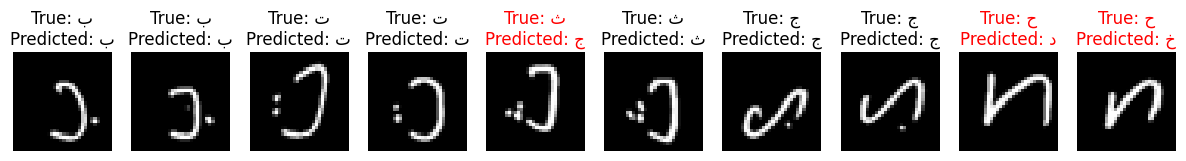

In [44]:
#First expirement
#SVM

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np

# SVM model
model = SVC(kernel="rbf")
model.fit(train_images, train_labels.ravel())
predicted = model.predict(test_images)

# Compute F1 score
f1 = f1_score(test_labels, predicted, average='macro')
print("F1 score for SVM:", f1)

display_images(test_images, test_labels, predicted)


In [32]:
#Splitting the data
ImgTraining, ImgValidation, LabelTraining, LabelValidation = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)


In [35]:
# Preprocess data (reshaping)
ImgTraining = ImgTraining.reshape((12096, 32, 32, 1))
ImgValidation = ImgValidation.reshape((1344, 32, 32, 1))

# One-hot encode the labels
LabelTraining = tf.keras.utils.to_categorical(LabelTraining - 1, num_classes=number_of_classes)
LabelValidation = tf.keras.utils.to_categorical(LabelValidation - 1, num_classes=number_of_classes)


For the first Neural Network Model:
Epoch 1/10
378/378 [==============================] - 8s 18ms/step - loss: 2.1276 - accuracy: 0.3457 - val_loss: 1.4817 - val_accuracy: 0.5037
Epoch 2/10
378/378 [==============================] - 3s 8ms/step - loss: 1.1279 - accuracy: 0.6161 - val_loss: 1.0962 - val_accuracy: 0.6220
Epoch 3/10
378/378 [==============================] - 3s 8ms/step - loss: 0.7883 - accuracy: 0.7255 - val_loss: 0.9153 - val_accuracy: 0.6897
Epoch 4/10
378/378 [==============================] - 5s 13ms/step - loss: 0.6018 - accuracy: 0.7881 - val_loss: 0.8471 - val_accuracy: 0.7039
Epoch 5/10
378/378 [==============================] - 5s 12ms/step - loss: 0.4661 - accuracy: 0.8392 - val_loss: 0.8348 - val_accuracy: 0.7388
Epoch 6/10
378/378 [==============================] - 4s 10ms/step - loss: 0.3721 - accuracy: 0.8718 - val_loss: 0.8111 - val_accuracy: 0.7344
Epoch 7/10
378/378 [==============================] - 3s 9ms/step - loss: 0.2873 - accuracy: 0.9043 - val_lo

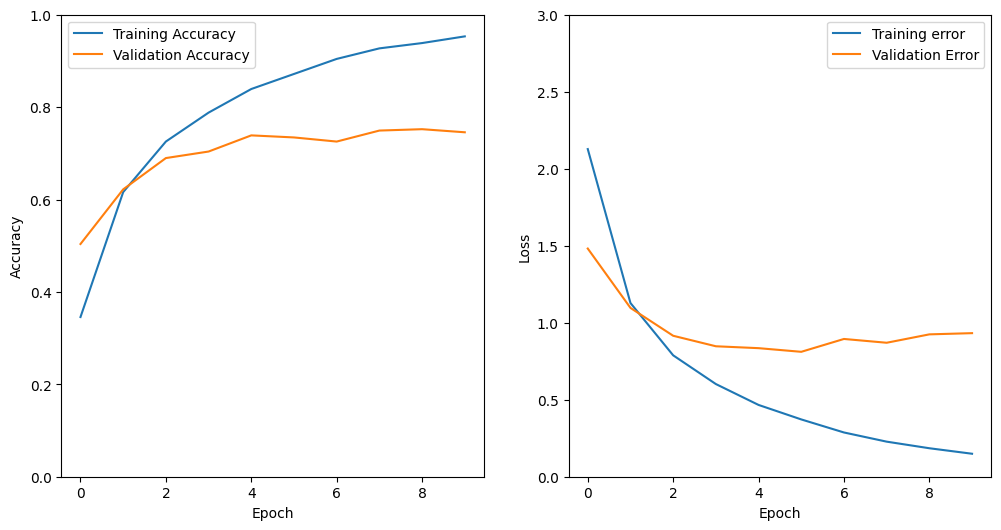

In [20]:
# Third expirement
# First Neural network model
model1 = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(number_of_classes, activation='softmax')
])

model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("For the first Neural Network Model:")
history1 = model1.fit(ImgTraining, LabelTraining, epochs=10, validation_data=(ImgValidation, LabelValidation))

# Evaluate the model on the test data for model1
test_loss1, test_acc1 = model1.evaluate(ImgValidation, LabelValidation)
test_acc1 = round(test_acc1 * 100, 2)
print('\nTest accuracy for model 1:', test_acc1, "%")

# Plot training accuracy and validation accuracy for model1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')  # Using a line plot with markers
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0, 1])

# Plot training error and validation error for model1
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training error')
plt.plot(history1.history['val_loss'], label='Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim([0, 3])
plt.show()


For the second Neural Network Model:
Epoch 1/10
378/378 [==============================] - 3s 7ms/step - loss: 2.6230 - accuracy: 0.2619 - val_loss: 2.2431 - val_accuracy: 0.3467
Epoch 2/10
378/378 [==============================] - 2s 6ms/step - loss: 2.0802 - accuracy: 0.3923 - val_loss: 2.0438 - val_accuracy: 0.3966
Epoch 3/10
378/378 [==============================] - 3s 8ms/step - loss: 1.8724 - accuracy: 0.4492 - val_loss: 1.9152 - val_accuracy: 0.4211
Epoch 4/10
378/378 [==============================] - 3s 9ms/step - loss: 1.7149 - accuracy: 0.4906 - val_loss: 1.8202 - val_accuracy: 0.4435
Epoch 5/10
378/378 [==============================] - 3s 7ms/step - loss: 1.5600 - accuracy: 0.5413 - val_loss: 1.6904 - val_accuracy: 0.4926
Epoch 6/10
378/378 [==============================] - 3s 7ms/step - loss: 1.4087 - accuracy: 0.5880 - val_loss: 1.5789 - val_accuracy: 0.5365
Epoch 7/10
378/378 [==============================] - 3s 8ms/step - loss: 1.2642 - accuracy: 0.6305 - val_loss:

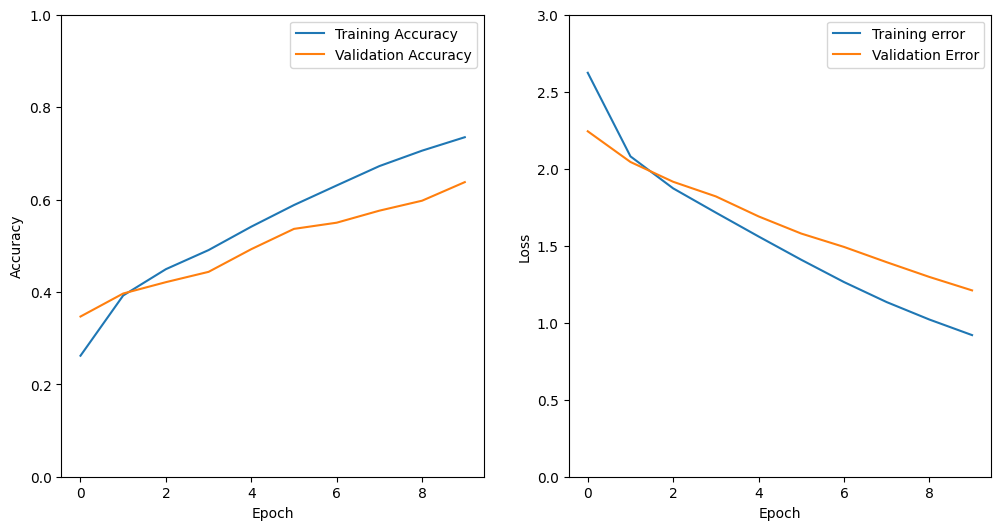

In [21]:
# Second Neural network model
model2 = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 1)),
    layers.Dense(384, activation='sigmoid'),
    layers.Dense(number_of_classes, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("For the second Neural Network Model:")
history2 = model2.fit(ImgTraining, LabelTraining, epochs=10, validation_data=(ImgValidation, LabelValidation))

# Evaluate the model on the test data for model2
test_loss2, test_acc2 = model2.evaluate(ImgValidation, LabelValidation)
test_acc2 = round(test_acc2 * 100, 2)
print('\nTest accuracy:', test_acc2, "%")

# Plot training accuracy and validation accuracy for model2
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0, 1])

# Plot training error and validation error for model2
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training error')
plt.plot(history2.history['val_loss'], label='Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim([0, 3])
plt.show()


In [36]:
# Choose the better model out of the two
if test_acc1 > test_acc2:
    print("Model 1 is better.")
    model1.save("best_model.keras")
else:
    print("Model 2 is better.")
    model2.save("best_model.keras")

# Compare the results of the models and suggest the best model.
best_parameter, best_value = max(
    [("Av", Av), ("test_acc1", test_acc1), ("test_acc2", test_acc2)],
    key=lambda x: x[1]
)

if (best_parameter == 'Av'):
    print(f"The best model is SVM with a value of {best_value}")
elif (best_parameter == 'test_acc1'):
    print(f"The best model is NN1 with a value of {best_value}")
elif (best_parameter == 'test_acc2'):
    print(f"The best model is NN2 with a value of {best_value}")


Model 1 is better.
The best model is NN1 with a value of 74.55
